![Final Lesson Exercise](images/Banner_FEX.png)

# Lesson #5: Data Cleaning - final assignment
## Good Movies - The IMDb movie dataset

## About this assignment
In this assignment, you will continue to explore information regarding good movies.<br/>

This time you will explore the data, detect and handle problematic data, using new capabilities, which you studied, including:
* Duplicative data
* Missing Data
* Outliers
* Data type casting

Note that these capabilites are common in data science and can usually be used in a one-liner.

## Preceding Step - import modules (packages)
This step is necessary in order to use external packages. 
We will be using pandas, numpy, matplotlib and seaborn for this task.
Numpy is a powerful and popular package for numerical arrays, used routinely in data science.
Matplotlib and seaborn are graphic engines.

Please notice the magic function (%matplotlib) that renders figures directly in a notebook.

**Use the following libraries for the assignment, when needed**:

In [3]:
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# === CELL TYPE: IMPORTS AND SETUP 

import time      # for testing use only
import os         # for testing use only

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Load the IMDb movie dataset

### 1. Instructions
<u>method name</u>: <b>load_csv</b>
<pre>The following is expected:
--- Complete the 'load_csv' function to load the dataset from the csv 
    specified by the 'file_name' parameter, into a pandas dataframe, 
    and return the dataframe (you've done this before)
</pre>

In [4]:
# 1.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: ANSWER 

def load_csv(file_name):
    return pd.read_csv(file_name)


In [5]:
# 1.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: SELF TESTING
# Use the following code to test your implementation:
file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies.csv'
df_imdb_movies = load_csv(file_name)
###
### YOUR CODE HERE
###


In [6]:
# 1.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation, if used)
# === CODE TYPE: SELF TESTING
# Add your additional tests here if needed:
###
### YOUR CODE HERE
###


In [7]:
# 1.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 1. - Test 1 (name: test1-1_load_csv, points: 0.1) - Sanity")
print ("\t--->Testing the implementation of 'load_csv' ...")

try:
    file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies.csv'
    df_imdb_movies = load_csv(file_name)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print (str(e))
    raise

print ("Good Job!\nYou've passed the 1st test for the 'load_csv' function implementation :-)")

Part 1. - Test 1 (name: test1-1_load_csv, points: 0.1) - Sanity
	--->Testing the implementation of 'load_csv' ...
Good Job!
You've passed the 1st test for the 'load_csv' function implementation :-)


In [8]:
# 1.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 1. - Test 2 (name: test1-2_load_csv, points: 0.1)")
print ("\t--->Testing the implementation of 'load_csv' ...")

try:
    file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies.csv'
    df_imdb_movies = load_csv(file_name)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print (str(e))
    raise
assert df_imdb_movies is not None, "You did not return an object from the 'load_csv' function, try again"
assert isinstance(df_imdb_movies, pd.DataFrame), "The object you returned is not a dataframe, try again"

print ("Good Job!\nYou've passed the 2nd test for the 'load_csv' function implementation :-)")

Part 1. - Test 2 (name: test1-2_load_csv, points: 0.1)
	--->Testing the implementation of 'load_csv' ...
Good Job!
You've passed the 2nd test for the 'load_csv' function implementation :-)


## 2. Basic data Exploration
Explore the data and gather information in the following cell(s).
This should assist you in the next steps of handling problematic data, using methods you've learned.
It is highly recommended to always visualize the data. Using your common sense you can quickly understand
a dataframe by looking at a chart of it.
Try using:
1. df.describe() (see documentation on how to describe numerical, catagorical, and\or strings)
2. df.hist()
3. df.info()
4. df.shape
5. pd.plotting.scatter_matrix(df)


In [9]:
# 2.a.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)

file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies.csv'
df_imdb_movies = load_csv(file_name)
print ('The first few rows:')
df_imdb_movies.head()

The first few rows:


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [10]:
# 2.b.i.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation, if used)
# === CODE TYPE: SELF EXPLORATORY
# Add your exploratory code (including visualization) here if needed:
###
# 2.a.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)

df_imdb_movies.describe()
###


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


array([[<AxesSubplot:title={'center':'num_critic_for_reviews'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'director_facebook_likes'}>,
        <AxesSubplot:title={'center':'actor_3_facebook_likes'}>],
       [<AxesSubplot:title={'center':'actor_1_facebook_likes'}>,
        <AxesSubplot:title={'center':'gross'}>,
        <AxesSubplot:title={'center':'num_voted_users'}>,
        <AxesSubplot:title={'center':'cast_total_facebook_likes'}>],
       [<AxesSubplot:title={'center':'facenumber_in_poster'}>,
        <AxesSubplot:title={'center':'num_user_for_reviews'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'title_year'}>],
       [<AxesSubplot:title={'center':'actor_2_facebook_likes'}>,
        <AxesSubplot:title={'center':'imdb_score'}>,
        <AxesSubplot:title={'center':'aspect_ratio'}>,
        <AxesSubplot:title={'center':'movie_facebook_likes'}>]],
      dtype=object)

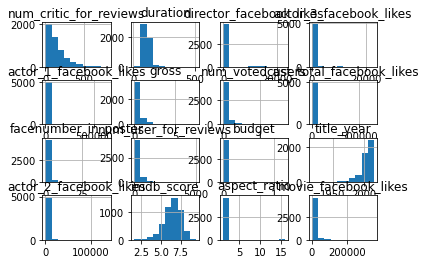

In [11]:
# 2.b.ii.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation, if used)
# === CODE TYPE: SELF EXPLORATORY
# Add your exploratory code (including visualization) here if needed:
###
df_imdb_movies.hist()
###


In [12]:
# 2.b.iii.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation, if used)
# === CODE TYPE: SELF EXPLORATORY
# Add your exploratory code (including visualization) here if needed:
###
df_imdb_movies.info()
###


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

array([[<AxesSubplot:xlabel='num_critic_for_reviews', ylabel='num_critic_for_reviews'>,
        <AxesSubplot:xlabel='duration', ylabel='num_critic_for_reviews'>,
        <AxesSubplot:xlabel='director_facebook_likes', ylabel='num_critic_for_reviews'>,
        <AxesSubplot:xlabel='actor_3_facebook_likes', ylabel='num_critic_for_reviews'>,
        <AxesSubplot:xlabel='actor_1_facebook_likes', ylabel='num_critic_for_reviews'>,
        <AxesSubplot:xlabel='gross', ylabel='num_critic_for_reviews'>,
        <AxesSubplot:xlabel='num_voted_users', ylabel='num_critic_for_reviews'>,
        <AxesSubplot:xlabel='cast_total_facebook_likes', ylabel='num_critic_for_reviews'>,
        <AxesSubplot:xlabel='facenumber_in_poster', ylabel='num_critic_for_reviews'>,
        <AxesSubplot:xlabel='num_user_for_reviews', ylabel='num_critic_for_reviews'>,
        <AxesSubplot:xlabel='budget', ylabel='num_critic_for_reviews'>,
        <AxesSubplot:xlabel='title_year', ylabel='num_critic_for_reviews'>,
        <A

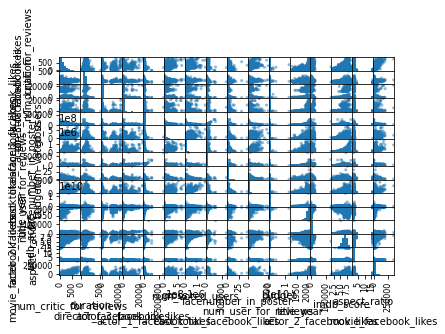

In [13]:
# 2.b.iv.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation, if used)
# === CODE TYPE: SELF EXPLORATORY
# Add your exploratory code (including visualization) here if needed:
###
pd.plotting.scatter_matrix(df_imdb_movies)
###


## 3. Duplicative data
In this section you need to:
* Detect duplicative rows or partially duplicative rows
* Remove these rows
Duplicate rows can happen because of various reasons. In most cases, it is wise to remove the duplicate.
For example, think about class registration, and how you would deal with a student that signed up twice.

### 3.a. Detect duplicative rows

### 3.a. Instructions
<u>method name</u>: <b>count_duplicatives</b>
<pre>The following is expected:
--- Complete the 'count_duplicatives' function to calculate and return the 
    count of all duplicative rows for the given 'df' parameter dataframe and 'col_name'
    If the 'col_name' parameter is None, you should identify duplicates in all columns.

    Note that for a single duplication, all duplicative rows should be counted as duplications, 
    besides the first one.
    For example, if row a appears 4 times (original + 3) and row b appears 6 times (original + 5),
    we expect to see the result of 8 (3 + 5).
    
    This function should return a single number.
    Hint: see documentation for pd.duplicated()
</pre>

In [14]:
# 3.a.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: ANSWER 

def count_duplicatives(df, col_name=None):
    if col_name == None:
        return df.duplicated().sum()
    return df.duplicated([col_name]).sum()


In [15]:
# 3.a.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: SELF TESTING
# Use the following code to test your implementation:
file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies.csv'
df_imdb_movies = load_csv(file_name)
dup_rows =  count_duplicatives(df_imdb_movies)
print("Self-test; dup_rows = ", dup_rows)
###
### YOUR CODE HERE
###


Self-test; dup_rows =  45


In [16]:
# 3.a.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation, if used)
# === CODE TYPE: SELF TESTING
# Add your additional tests here if needed:
###
### YOUR CODE HERE
###


In [17]:
# 3.a.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 3.a - Test 1 (name: test3a-1_count_duplicatives, points: 0.1) - Sanity")
print ("\t--->Testing the implementation of 'count_duplicatives' ...")

dup_rows =  -1
try:
    file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies.csv'
    df_imdb_movies = load_csv(file_name)
    dup_rows =  count_duplicatives(df_imdb_movies)
    print ('Duplicatives:', dup_rows)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print (str(e))
    raise
    
print ("\nGood Job!\nYou've passed the 1st test of the 'count_duplicatives' method implementation :-)")

Part 3.a - Test 1 (name: test3a-1_count_duplicatives, points: 0.1) - Sanity
	--->Testing the implementation of 'count_duplicatives' ...
Duplicatives: 45

Good Job!
You've passed the 1st test of the 'count_duplicatives' method implementation :-)


In [18]:
# 3.a.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 3.a - Test 2 (name: test3a-2_count_duplicatives, points: 0.1)")
print ("\t--->Testing the implementation of 'count_duplicatives' ...")

dup_rows =  -1
try:
    file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies.csv'
    df_imdb_movies = load_csv(file_name)
    dup_rows =  count_duplicatives(df_imdb_movies)
    print ('Duplicatives:', dup_rows)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print (str(e))
    raise
    
assert 45  == dup_rows, "wrong number of duplacitive rows"

print ("\nGood Job!\nYou've passed the 2nd test of the 'count_duplicatives' method implementation :-)")

Part 3.a - Test 2 (name: test3a-2_count_duplicatives, points: 0.1)
	--->Testing the implementation of 'count_duplicatives' ...
Duplicatives: 45

Good Job!
You've passed the 2nd test of the 'count_duplicatives' method implementation :-)


In [19]:
# 3.a.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 3.a - Test 3 (name: test3a-3_count_duplicatives, points: 0.2)")
print ("\t--->Testing the implementation of 'count_duplicatives' ...")

partial_dup_rows_by_movie_link = -1
try:
    file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies.csv'
    df_imdb_movies = load_csv(file_name)
    col_name = 'movie_imdb_link'
    partial_dup_rows_by_movie_link = count_duplicatives(df_imdb_movies, col_name)
    print ("Partial duplicatives by '%s': %d" %(col_name, partial_dup_rows_by_movie_link))
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print (str(e))
    raise
    
assert 124 ==  partial_dup_rows_by_movie_link, "wrong number of partial duplacitive rows"

print ("\nGood Job!\nYou've passed the 3rd test of the 'count_duplicatives' method implementation :-)")

Part 3.a - Test 3 (name: test3a-3_count_duplicatives, points: 0.2)
	--->Testing the implementation of 'count_duplicatives' ...
Partial duplicatives by 'movie_imdb_link': 124

Good Job!
You've passed the 3rd test of the 'count_duplicatives' method implementation :-)


### 3.b. Remove duplicative rows

### 3.b. Instructions
<u>method name</u>: <b>remove_duplicatives</b>
<pre>The following is expected:
--- Complete the 'remove_duplicatives' function to return a copy of a the given 'df' dataframe,
    after removing the duplicatives.
    
    If the 'col_name' parameter is None, you should remove duplicative rows by any column
    Otherwise, identify and remove duplicates just in regard to the column 'col_name'.

    Note that for a each duplication, you should keep only the first occurrence. 
</pre>

In [20]:
# 3.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: ANSWER 

def remove_duplicatives(df, col_name=None):
    ###
    ### YOUR CODE HERE
    ###
    df2 = df.copy()
    if col_name == None:
        return df2.drop_duplicates(keep="first")
    return df2.drop_duplicates(subset=[col_name], keep="first")


In [21]:
# 3.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: SELF TESTING
# Use the following code to test your implementation:
file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies.csv'
df_imdb_movies = load_csv(file_name)
col_name = 'movie_imdb_link'
df_rem_dup_rows =  remove_duplicatives(df_imdb_movies)
df_rem_partial_dups = remove_duplicatives(df_imdb_movies, col_name)
print('Self test; df_rem_dup_rows = ')
print(df_rem_dup_rows)
print('Self test; df_rem_partial_dups = ')
print(df_rem_partial_dups)
###
### YOUR CODE HERE
###


Self test; df_rem_dup_rows = 
      color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
4       NaN        Doug Walker                     NaN       NaN   
...     ...                ...                     ...       ...   
5038  Color        Scott Smith                     1.0      87.0   
5039  Color                NaN                    43.0      43.0   
5040  Color   Benjamin Roberds                    13.0      76.0   
5041  Color        Daniel Hsia                    14.0     100.0   
5042  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                         0.0                   855.0  Joel David Moore   
1  

In [22]:
# 3.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation, if used)
# === CODE TYPE: SELF TESTING
# Add your additional tests here if needed:
###
### YOUR CODE HERE
###


In [23]:
# 3.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 3.b - Test 1 (name: test3b-1_remove_duplicatives, points: 0.1) - Sanity")
print ("\t--->Testing the implementation of 'remove_duplicatives' ...")

try:
    file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies.csv'
    df_imdb_movies = load_csv(file_name)
    col_name = 'movie_imdb_link'
    df_rem_dup_rows =  remove_duplicatives(df_imdb_movies)
    df_rem_partial_dups = remove_duplicatives(df_imdb_movies, col_name)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print (str(e))
    raise
    
print ("\nGood Job!\nYou've passed the 1st test of the 'remove_duplicatives' method implementation :-)")

Part 3.b - Test 1 (name: test3b-1_remove_duplicatives, points: 0.1) - Sanity
	--->Testing the implementation of 'remove_duplicatives' ...

Good Job!
You've passed the 1st test of the 'remove_duplicatives' method implementation :-)


In [24]:
# 3.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 3.b - Test 2 (name: test3b-2_remove_duplicatives, points: 0.3)")
print ("\t--->Testing the implementation of 'remove_duplicatives' ...")


try:
    file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies.csv'
    df_imdb_movies = load_csv(file_name)
    col_name = 'movie_imdb_link'
    df_rem_dup_rows =  remove_duplicatives(df_imdb_movies)
    df_rem_partial_dups = remove_duplicatives(df_imdb_movies, col_name)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print (str(e))
    raise
    
assert 4998  == df_rem_dup_rows.shape[0], "wrong number of duplacitive rows"
assert 4919 ==  df_rem_partial_dups.shape[0], "wrong number of partial duplacitive rows"
    
print ("\nGood Job!\nYou've passed the 2nd test of the 'remove_duplicatives' method implementation :-)")

Part 3.b - Test 2 (name: test3b-2_remove_duplicatives, points: 0.3)
	--->Testing the implementation of 'remove_duplicatives' ...

Good Job!
You've passed the 2nd test of the 'remove_duplicatives' method implementation :-)


## 4. Handle missing data
In this section you'll need to detect and handle missing data.<br/>
Remember that:
* Not all data types are treated equally
* In some cases, many fields have missing data, and the record (row) just seems to be corrupt
* Different fields (columns) might have their own logic

In [25]:
# 4.a.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation, if used)
# === CODE TYPE: SELF EXPLORATORY
# Add your exploratory code (including visualization) here if needed:
# see df_rem_partial_dups or df_rem_dup_rows
###
### YOUR CODE HERE
###


### 4.b. Remove corrupt rows
Remove rows with too many missing values. A row without values can be caused by many reasons,
Usually some type of error upstream from our data. We would like to try to fix those we can,
and discard the rest.

### 4.b. Instructions
<u>method name</u>: <b>remove_corrupt_rows</b>
<pre>The following is expected:
--- Complete the 'remove_corrupt_rows' function to return a copy of a the given 'df' dataframe,
    after removing rows with too many missing values.
    A row with too many missing columns is a row with MORE THAN 'num_max_missing_cols' missing columns.
    (if a 
</pre>

In [30]:
# 4.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: ANSWER 

def remove_corrupt_rows(df, num_max_missing_cols):
    val = df.shape[1] - num_max_missing_cols
    df2 = df.copy()
    df2.dropna(axis=0, thresh=val, inplace=True)
    return df2


In [31]:
# 4.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: SELF TESTING
# Use the following code to test your implementation:
file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies.csv'
col_name = 'movie_imdb_link'
df_imdb_movies = load_csv(file_name)
print("Duplicates in = ", count_duplicatives(df_imdb_movies))
df_cln = remove_duplicatives(df_imdb_movies, col_name)
df_rem_corrupt = remove_corrupt_rows(df_cln, 3)
print("Duplicates out = ", count_duplicatives(df_rem_corrupt))
###
### YOUR CODE HERE
###


Duplicates in =  45
Duplicates out =  0


In [32]:
# 4.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation, if used)
# === CODE TYPE: SELF TESTING
# Add your additional tests here if needed:

###
### YOUR CODE HERE
###


In [33]:
# 4.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 4.b. - Test 1 (name: test4b-1_remove_corrupt_rows, points: 0.1) - Sanity")
print ("\t--->Testing the implementation of 'remove_corrupt_rows' ...")

print ("Test 1 - Testing the implementations of the 'remove_corrupt_rows' method ...\n")

file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies.csv'
col_name = 'movie_imdb_link'
try:
    df_imdb_movies = load_csv(file_name)
    df_cln = remove_duplicatives(df_imdb_movies, col_name)
    df_rem_corrupt = remove_corrupt_rows(df_cln, 3)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print (str(e))
    raise

print ("\nGood Job!\nYou've passed the 1st test of the 'remove_corrupt_rows' method implementation :-)")

Part 4.b. - Test 1 (name: test4b-1_remove_corrupt_rows, points: 0.1) - Sanity
	--->Testing the implementation of 'remove_corrupt_rows' ...
Test 1 - Testing the implementations of the 'remove_corrupt_rows' method ...


Good Job!
You've passed the 1st test of the 'remove_corrupt_rows' method implementation :-)


In [34]:
# 4.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 


print ("Part 4.b. - Test 2 (name: test4b-2_remove_corrupt_rows, points: 0.4)")
print ("\t--->Testing the implementation of 'remove_corrupt_rows' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies.csv'
col_name = 'movie_imdb_link'
try:
    df_imdb_movies = load_csv(file_name)
    df_cln = remove_duplicatives(df_imdb_movies, col_name)
    df_rem_corrupt = remove_corrupt_rows(df_cln, 3)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print (str(e))
    raise

for nIndx in [4,479,2412,4281]:
    assert nIndx not in df_rem_corrupt.index, "row '%d' should be filtered" %(nIndx)
    
print ("\nGood Job!\nYou've passed the 2nd test of the 'remove_corrupt_rows' method implementation :-)")

Part 4.b. - Test 2 (name: test4b-2_remove_corrupt_rows, points: 0.4)
	--->Testing the implementation of 'remove_corrupt_rows' ...

Good Job!
You've passed the 2nd test of the 'remove_corrupt_rows' method implementation :-)


In [35]:
# 4.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 4.b. - Test 3 (name: test4b-3_remove_corrupt_rows, points: 0.5)")
print ("\t--->Testing the implementation of 'remove_corrupt_rows' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies.csv'
col_name = 'movie_imdb_link'
try:
    df_imdb_movies = load_csv(file_name)
    df_cln = remove_duplicatives(df_imdb_movies, col_name)
    df_rem_corrupt = remove_corrupt_rows(df_cln, 3)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print (str(e))
    raise

nan_vals_which_should_be_removed = [177, 260,  1265, 1736, 2143, 2370, 3539, 4288, 4299, 4999, 5032, 5038]
for nIndx in nan_vals_which_should_be_removed:
    assert nIndx not in df_rem_corrupt.index, "row '%d' should be filtered" %(nIndx)
    
print ("\nGood Job!\nYou've passed the 3rd test of the 'remove_corrupt_rows' method implementation :-)")

Part 4.b. - Test 3 (name: test4b-3_remove_corrupt_rows, points: 0.5)
	--->Testing the implementation of 'remove_corrupt_rows' ...

Good Job!
You've passed the 3rd test of the 'remove_corrupt_rows' method implementation :-)


### 4.c. Replace missing values
In this section you need to replace the values of missing data cells.<br/>
There are multiple ways to fill in missing values.
We will create three catagories:
* Predefined columns, which will get a given default value
* Numeric columns
* Categorical colums

### 4.c. Instructions
<u>method name</u>: <b>replace_missing_values</b>
<pre>The following is expected:
--- Complete the 'replace_missing_values' function to return a copy of a the given 'df' dataframe
    after replacing missing values.

    - The 'col_to_def_val_dict' is a dictionary of columns to default values.
      In these columns (keys), you need to replace the missing value with the given default value (values).

      Other columns are either numeric or categorical.
      - Missing values from numeric columns, should be replaced with the median.
      - Missing values from categorical columns, should be replaced with the most frequent value.
         * Note: We consider categorical columns as columns which are not in 
               the 'col_to_def_val_dict' dictionary and are not numeric columns. 
         * Note 2: In this assignment none of the col_to_def_val_dict columns will be numeric.
         
         Hint - make a list of numerical and catagorical columns and deal with them separately 
</pre>

In [107]:
# 4.c.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: ANSWER 

def replace_missing_values(df, col_to_def_val_dict):
    df2 = df.copy()
    df2.fillna(value=col_to_def_val_dict, inplace=True)
    for column in df2.select_dtypes(include=['number']).columns:
        df2[column].fillna(value=df2[column].median(), inplace=True)
    for column in df2.select_dtypes(exclude=['number']).columns:
        df2[column].fillna(df[column].value_counts().idxmax() , inplace=True)
    return df2

In [108]:
# 4.c.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: SELF TESTING
# Use the following code to test your implementation:

file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies.csv'
col_name = 'movie_imdb_link'
col_to_def_val = {'director_name':'unknown', 
    'actor_1_name':'unknown', 'actor_2_name':'unknown', 'actor_3_name':'unknown', 'genres':'unknown', 
    'plot_keywords':'unknown', 'movie_title':'unknown', 'movie_imdb_link':'unknown', 'country':'unknown'}
df_imdb_movies = load_csv(file_name)
df_cln = remove_duplicatives(df_imdb_movies, col_name)
df_rem_corrupt = remove_corrupt_rows(df_cln, 3)
df_rpl_missing = replace_missing_values(df_rem_corrupt, col_to_def_val)

print("In = ", df_imdb_movies.shape, count_duplicatives(df_imdb_movies), ' duplicates,', df_imdb_movies.isna().sum().sum(), ' nulls')
print("#1 = ", df_cln.shape, count_duplicatives(df_cln), ' duplicates,', df_cln.isna().sum().sum(), ' nulls')
print("#2 = ", df_rem_corrupt.shape, count_duplicatives(df_rem_corrupt), ' duplicates,', df_rem_corrupt.isna().sum().sum(), ' nulls')
print("Out = ", df_rpl_missing.shape, count_duplicatives(df_rpl_missing), ' duplicates,', df_rpl_missing.isna().sum().sum(), ' nulls')
###
### YOUR CODE HERE
###


In =  (5043, 28) 45  duplicates, 2698  nulls
#1 =  (4919, 28) 0  duplicates, 2657  nulls
#2 =  (4724, 28) 0  duplicates, 1580  nulls
Out =  (4724, 28) 0  duplicates, 0  nulls


In [109]:
# 4.c.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation, if used)
# === CODE TYPE: SELF TESTING
# Add your additional tests here if needed:

###
### YOUR CODE HERE
###


In [110]:
# 4.c.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 4.c. - Test 1 (name: test4c-1_replace_missing_values, points: 0.1) - Sanity")
print ("\t--->Testing the implementation of 'replace_missing_values' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies.csv'
col_name = 'movie_imdb_link'
col_to_def_val = {'director_name':'unknown', 
    'actor_1_name':'unknown', 'actor_2_name':'unknown', 'actor_3_name':'unknown', 'genres':'unknown', 
    'plot_keywords':'unknown', 'movie_title':'unknown', 'movie_imdb_link':'unknown', 'country':'unknown'}
try:
    df_imdb_movies = load_csv(file_name)
    df_cln = remove_duplicatives(df_imdb_movies, col_name)
    df_rem_corrupt = remove_corrupt_rows(df_cln, 3)
    df_rpl_missing = replace_missing_values(df_rem_corrupt, col_to_def_val)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print (str(e))
    raise
    
print ("\nGood Job!\nYou've passed the 1st test of the 'replace_missing_values' method implementation :-)")

Part 4.c. - Test 1 (name: test4c-1_replace_missing_values, points: 0.1) - Sanity
	--->Testing the implementation of 'replace_missing_values' ...

Good Job!
You've passed the 1st test of the 'replace_missing_values' method implementation :-)


In [111]:
# 4.c.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 4.c. - Test 2 (name: test4c-2_replace_missing_values, points: 0.2)")
print ("\t--->Testing the implementation of 'replace_missing_values' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies.csv'
col_name = 'movie_imdb_link'
col_to_def_val = {'director_name':'unknown', 
    'actor_1_name':'unknown', 'actor_2_name':'unknown', 'actor_3_name':'unknown', 'genres':'unknown', 
    'plot_keywords':'unknown', 'movie_title':'unknown', 'movie_imdb_link':'unknown', 'country':'unknown'}
try:
    df_imdb_movies = load_csv(file_name)
    df_cln = remove_duplicatives(df_imdb_movies, col_name)
    df_rem_corrupt = remove_corrupt_rows(df_cln, 3)
    df_rpl_missing = replace_missing_values(df_rem_corrupt, col_to_def_val)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print (str(e))
    raise
    
assert 0==len(df_rpl_missing[df_rpl_missing.isnull().T.any()].index.values), "There should be no missing values after 'replace_missing_values'"
assert df_rem_corrupt.shape[0] == df_rpl_missing.shape[0] and df_rem_corrupt.shape[1] == df_rpl_missing.shape[1],  "Dataframes 'df_rem_corrupt' & 'df_rpl_missing' should have the same shape"

print ("\nGood Job!\nYou've passed the 2nd test of the 'replace_missing_values' method implementation :-)")

Part 4.c. - Test 2 (name: test4c-2_replace_missing_values, points: 0.2)
	--->Testing the implementation of 'replace_missing_values' ...

Good Job!
You've passed the 2nd test of the 'replace_missing_values' method implementation :-)


In [112]:
# 4.c.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 4.c. - Test 3 (name: test4c-3_replace_missing_values, points: 0.4)")
print ("\t--->Testing the implementation of 'replace_missing_values' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies.csv'
col_name = 'movie_imdb_link'
col_to_def_val = {'director_name':'unknown', 
    'actor_1_name':'unknown', 'actor_2_name':'unknown', 'actor_3_name':'unknown', 'genres':'unknown', 
    'plot_keywords':'unknown', 'movie_title':'unknown', 'movie_imdb_link':'unknown', 'country':'unknown'}
try:
    df_imdb_movies = load_csv(file_name)
    df_cln = remove_duplicatives(df_imdb_movies, col_name)
    df_rem_corrupt = remove_corrupt_rows(df_cln, 3)
    df_rpl_missing = replace_missing_values(df_rem_corrupt, col_to_def_val)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print (str(e))
    raise

assert 20000000.0 == df_rpl_missing['budget'].loc[55],"Wrong value for the 'budget' column"
assert 2.35 == df_rpl_missing['aspect_ratio'].loc[84],"Wrong value for the 'aspect_ratio' column"
assert 25105552.5 == df_rpl_missing['gross'].loc[98],"Wrong value for the 'gross' column"
print ('Finished numeric field missing value tests')
print ('======================')

print ("\nGood Job!\nYou've passed the 3rd test of the 'replace_missing_values' method implementation :-)")

Part 4.c. - Test 3 (name: test4c-3_replace_missing_values, points: 0.4)
	--->Testing the implementation of 'replace_missing_values' ...
Finished numeric field missing value tests

Good Job!
You've passed the 3rd test of the 'replace_missing_values' method implementation :-)


In [113]:
# 4.c.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 4.c. - Test 4 (name: test4c-4_replace_missing_values, points: 0.3)")
print ("\t--->Testing the implementation of 'replace_missing_values' ...")
print ("\n\t====> Full grading test - the following test can not be seen before submission")
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Part 4.c. - Test 4 (name: test4c-4_replace_missing_values, points: 0.3)
	--->Testing the implementation of 'replace_missing_values' ...

	====> Full grading test - the following test can not be seen before submission


## 5. Handle outliers
In this section you'll need to detect and handle outliers in the data.<br/>
You'll need to implement:
* Outlier detection, using the IQR method
* Outlier detection, using the distance to the average of the column

Note: Using visualization was also one of the techniques you've learned.<br/>
      You are advised to use it as a preprocessing step, to get a feeling for outliers.

In [37]:
# 5.a.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation, if used)
# === CODE TYPE: SELF EXPLORATORY
# Add your exploratory code (including visualization) here if needed:
pd.plotting.scatter_matrix(df_rpl_missing, figsize = [20,20])
###
### YOUR CODE HERE
###


### 5.b. Outlier detection, using the IQR value

### 5.b. Instructions
<u>method name</u>: <b>outlier_detection_iqr</b>
<pre>The following is expected:
--- Complete the 'outlier_detection_iqr' function to return a copy of a the given 'df' dataframe
    after dealing with outliers, using the IQR method as you learned in this lesson.
    
    An outlier will be considered a value greater than Q3 + 1.5*IQR,
       or a value less than Q1 - 1.5*IQR.

    You should only refer to numerical columns when detecting outliers.   
    If the value is an outlier, replace it with np.nan 
    
    Note: this is only relevant for numerical columns
</pre>

In [114]:
# 5.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: ANSWER 

def outlier_detection_iqr(df):
    df2 = df.copy()
    for column in df.select_dtypes(include=['number']).columns:
        Q3 = np.percentile(df2[column], 75)
        Q1 = np.percentile(df2[column], 25)
        IQR = Q3 - Q1
        IQR_r = 1.5*IQR
        df2[column].mask((df2[column] < Q1 -IQR_r) | (df2[column] > Q3 + IQR_r ), np.nan, inplace=True)
    return df2


In [115]:
# 5.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: SELF TESTING
# Use the following code to test your implementation:
file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies.csv'
col_name = 'movie_imdb_link'

col_to_def_val = {'director_name':'unknown', 
    'actor_1_name':'unknown', 'actor_2_name':'unknown', 'actor_3_name':'unknown', 'genres':'unknown', 
    'plot_keywords':'unknown', 'movie_title':'unknown', 'movie_imdb_link':'unknown', 'country':'unknown'}
df_imdb_movies = load_csv(file_name)
df_cln = remove_duplicatives(df_imdb_movies, col_name)
df_rem_corrupt = remove_corrupt_rows(df_cln, 3)
df_rpl_missing = replace_missing_values(df_rem_corrupt, col_to_def_val)
df_outlier_rem = outlier_detection_iqr(df_rpl_missing)

print("In = ", df_rpl_missing.isna().sum().sum(), ' nulls')
print("Out = ",df_outlier_rem.isna().sum().sum(), ' nulls')

###
### YOUR CODE HERE
###


In =  0  nulls
Out =  5560  nulls


In [116]:
# 5.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation, if used)
# === CODE TYPE: SELF TESTING
# Add your additional tests here if needed:

###
### YOUR CODE HERE
###


In [117]:
# 5.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 


print ("Part 5.b. - Test 1 (name: test5b-1_outlier_detection_iqr, points: 0.1) - Sanity")
print ("\t--->Testing the implementation of 'outlier_detection_iqr' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies.csv'
col_name = 'movie_imdb_link'

col_to_def_val = {'director_name':'unknown', 
    'actor_1_name':'unknown', 'actor_2_name':'unknown', 'actor_3_name':'unknown', 'genres':'unknown', 
    'plot_keywords':'unknown', 'movie_title':'unknown', 'movie_imdb_link':'unknown', 'country':'unknown'}
try:
    df_imdb_movies = load_csv(file_name)
    df_cln = remove_duplicatives(df_imdb_movies, col_name)
    df_rem_corrupt = remove_corrupt_rows(df_cln, 3)
    df_rpl_missing = replace_missing_values(df_rem_corrupt, col_to_def_val)
    df_outlier_rem = outlier_detection_iqr(df_rpl_missing)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print (str(e))
    raise

print ("\nGood Job!\nYou've passed the 1st test of the 'outlier_detection_iqr' method implementation :-)")

Part 5.b. - Test 1 (name: test5b-1_outlier_detection_iqr, points: 0.1) - Sanity
	--->Testing the implementation of 'outlier_detection_iqr' ...

Good Job!
You've passed the 1st test of the 'outlier_detection_iqr' method implementation :-)


In [118]:
# 5.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 5.b. - Test 2 (name: test5b-2_outlier_detection_iqr, points: 0.4)")
print ("\t--->Testing the implementation of 'outlier_detection_iqr' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies.csv'
col_name = 'movie_imdb_link'

col_to_def_val = {'director_name':'unknown', 
    'actor_1_name':'unknown', 'actor_2_name':'unknown', 'actor_3_name':'unknown', 'genres':'unknown', 
    'plot_keywords':'unknown', 'movie_title':'unknown', 'movie_imdb_link':'unknown', 'country':'unknown'}
try:
    df_imdb_movies = load_csv(file_name)
    df_cln = remove_duplicatives(df_imdb_movies, col_name)
    df_rem_corrupt = remove_corrupt_rows(df_cln, 3)
    df_rpl_missing = replace_missing_values(df_rem_corrupt, col_to_def_val)
    df_outlier_rem = outlier_detection_iqr(df_rpl_missing)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print (str(e))
    raise
df_outliers = df_outlier_rem.isnull().sum().to_frame('iqr_outliers')
assert 195 == df_outliers['iqr_outliers']['num_critic_for_reviews'], "Wrong number of 'num_critic_for_reviews' outliers"
assert 414 == df_outliers['iqr_outliers']['gross'], "Wrong number of 'gross' outliers"
assert 108 == df_outliers['iqr_outliers']['imdb_score'], "Wrong number of 'imdb_score' outliers"
assert (4724, 28) == df_outlier_rem.shape, "The 'df_outlier_rem' datafrane has the wrong shape"

print ("\nGood Job!\nYou've passed the 2nd test of the 'outlier_detection_iqr' method implementation :-)")

Part 5.b. - Test 2 (name: test5b-2_outlier_detection_iqr, points: 0.4)
	--->Testing the implementation of 'outlier_detection_iqr' ...

Good Job!
You've passed the 2nd test of the 'outlier_detection_iqr' method implementation :-)


In [119]:
# 5.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 


print ("Part 5.b. - Test 3 (name: test5b-3_outlier_detection_iqr, points: 0.5)")
print ("\t--->Testing the implementation of 'outlier_detection_iqr' ...")
print ("\n\t====> Full grading test - the following test can not be seen before submission")

###
### AUTOGRADER TEST - DO NOT REMOVE
###


Part 5.b. - Test 3 (name: test5b-3_outlier_detection_iqr, points: 0.5)
	--->Testing the implementation of 'outlier_detection_iqr' ...

	====> Full grading test - the following test can not be seen before submission


### 5.c. Outlier detection, using the distance from the average

### 5.c. Instructions
<u>method name</u>: <b>outlier_detection_dist_to_avg</b>
<pre>The following is expected:
--- Complete the 'outlier_detection_dist_to_avg' function to return a copy of a the given 'df' dataframe,
    after dealing with outliers.

    This time, an outlier is considered as such, 
          if the absolute value of the z-score (as you learned in the lesson) is greater than 3.

    Notes:    
         * The standard diviation (std) needs to be calculated as std for a sample (and not for a population).
         * You should only refer to numerical columns when detecting outliers.   
         * If the value is an outlier, replace it with np.nan
</pre>

In [120]:
# 5.c.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: ANSWER 

def outlier_detection_zscore_dist(df):
    df2 = df.copy()
    for column in df.select_dtypes(include=['number']).columns:
        score = (df2[column] - df2[column].mean()) / df2[column].std()
        df2[column].mask( abs(score) > 3, np.nan, inplace=True)
    return df2


In [121]:
# 5.c.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: SELF TESTING
# Use the following code to test your implementation:
file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies.csv'
col_name = 'movie_imdb_link'
col_to_def_val = {'director_name':'unknown', 
    'actor_1_name':'unknown', 'actor_2_name':'unknown', 'actor_3_name':'unknown', 'genres':'unknown', 
    'plot_keywords':'unknown', 'movie_title':'unknown', 'movie_imdb_link':'unknown', 'country':'unknown'}
df_imdb_movies = load_csv(file_name)
df_cln = remove_duplicatives(df_imdb_movies, col_name)
df_rem_corrupt = remove_corrupt_rows(df_cln, 3)
df_rpl_missing = replace_missing_values(df_rem_corrupt, col_to_def_val)
df_outlier2_rem = outlier_detection_zscore_dist(df_rpl_missing)


print("In = ", df_rpl_missing.isna().sum().sum(), ' nulls')
print("Out = ",df_outlier2_rem.isna().sum().sum(), ' nulls')

###
### YOUR CODE HERE
###


In =  0  nulls
Out =  1269  nulls


In [122]:
# 5.c.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation, if used)
# === CODE TYPE: SELF TESTING
# Add your additional tests here if needed:

###
### YOUR CODE HERE
###


In [123]:
# 5.c.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 5.c. - Test 1 (name: test5c-1_outlier_detection_zscore_dist, points: 0.1) - Sanity")
print ("\t--->Testing the implementation of 'outlier_detection_zscore_dist' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies.csv'
col_name = 'movie_imdb_link'

col_to_def_val = {'director_name':'unknown', 
    'actor_1_name':'unknown', 'actor_2_name':'unknown', 'actor_3_name':'unknown', 'genres':'unknown', 
    'plot_keywords':'unknown', 'movie_title':'unknown', 'movie_imdb_link':'unknown', 'country':'unknown'}
try:
    df_imdb_movies = load_csv(file_name)
    df_cln = remove_duplicatives(df_imdb_movies, col_name)
    df_rem_corrupt = remove_corrupt_rows(df_cln, 3)
    df_rpl_missing = replace_missing_values(df_rem_corrupt, col_to_def_val)
    df_outlier2_rem = outlier_detection_zscore_dist(df_rpl_missing)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print (str(e))
    raise

print ("\nGood Job!\nYou've passed the 1st test of the 'outlier_detection_zscore_dist' method implementation :-)")

Part 5.c. - Test 1 (name: test5c-1_outlier_detection_zscore_dist, points: 0.1) - Sanity
	--->Testing the implementation of 'outlier_detection_zscore_dist' ...

Good Job!
You've passed the 1st test of the 'outlier_detection_zscore_dist' method implementation :-)


In [124]:
# 5.c.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 5.c. - Test 2 (name: test5c-2_outlier_detection_zscore_dist, points: 0.4)")
print ("\t--->Testing the implementation of 'outlier_detection_zscore_dist' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies.csv'
col_name = 'movie_imdb_link'

col_to_def_val = {'director_name':'unknown', 
    'actor_1_name':'unknown', 'actor_2_name':'unknown', 'actor_3_name':'unknown', 'genres':'unknown', 
    'plot_keywords':'unknown', 'movie_title':'unknown', 'movie_imdb_link':'unknown', 'country':'unknown'}
try:
    df_imdb_movies = load_csv(file_name)
    df_cln = remove_duplicatives(df_imdb_movies, col_name)
    df_rem_corrupt = remove_corrupt_rows(df_cln, 3)
    df_rpl_missing = replace_missing_values(df_rem_corrupt, col_to_def_val)
    df_outlier2_rem = outlier_detection_zscore_dist(df_rpl_missing)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print (str(e))
    raise
    
df_outliers2 = df_outlier2_rem.isnull().sum().to_frame('zscore_outliers')
assert 79 == df_outliers2['zscore_outliers']['num_critic_for_reviews'], "Wrong number of 'num_critic_for_reviews' outliers"
assert 112 == df_outliers2['zscore_outliers']['gross'], "Wrong number of 'gross' outliers"
assert 42 == df_outliers2['zscore_outliers']['imdb_score'], "Wrong number of 'imdb_score' outliers"
assert (4724, 28) == df_outlier2_rem.shape, "The 'df_outlier_rem' datafrane has the wrong shape"

print ("\nGood Job!\nYou've passed the 2nd test of the 'outlier_detection_zscore_dist' method implementation :-)")

Part 5.c. - Test 2 (name: test5c-2_outlier_detection_zscore_dist, points: 0.4)
	--->Testing the implementation of 'outlier_detection_zscore_dist' ...

Good Job!
You've passed the 2nd test of the 'outlier_detection_zscore_dist' method implementation :-)


In [125]:
# 5.c.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 5.c. - Test 3 (name: test5c-3_outlier_detection_zscore_dist, points: 0.5)")
print ("\t--->Testing the implementation of 'outlier_detection_zscore_dist' ...")
print ("\n\t====> Full grading test - the following test can not be seen before submission")

###
### AUTOGRADER TEST - DO NOT REMOVE
###


Part 5.c. - Test 3 (name: test5c-3_outlier_detection_zscore_dist, points: 0.5)
	--->Testing the implementation of 'outlier_detection_zscore_dist' ...

	====> Full grading test - the following test can not be seen before submission


## 6. Transfer data to categorical columns

### 6. Instructions
<u>method name</u>: <b>transfer_to_categorical</b>
<pre>The following is expected:
--- Complete the 'transfer_to_categorical' function to return a copy of a the given 'df' dataframe,
    after transfering column values to categorical data for each input column, as explained below.
    Catagorical data allows easier and simpler analysis and is a popular statistics trick (Think
    about Covid risk-age groups, for example).

    A. Numeric columns
    The 'numeric_to_bin_value_dict' is a dictionary consisting the numeric column names as keys and
       a list of bin values as values. 
          For instance it might look as following {'duration': [4, 5, 10, 20, 120, 200]}.
          Catagory one will be for values between 4 and 5, two for between 5 and 10, and so on.

        Notes:
        * Expect the bin value list to consist of 6 values.
        * Use this dictionay to  trasfer the values of each of these
          numeric columns separately to 5 groups from 1 to 5.
        * Add the suffix '_categotial' to the new column name.
          For instance, if the origanal column name is 'duration',
          the new column name should be called 'duration_categotial'
          
        Hint: see pd.cut()

    B. Non-Numeric columns
    You should ADD for each categorical column in 'categorical_col_names',
        a single binary indicator variable column (also called one-hot) for each unique value in that column.
        Note: Use the original column name as a prefix to the new binary indicator column names.
        Note: 'categorical_col_names' may contain columns with non-string values. 
</pre>

In [128]:
# 6.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: ANSWER 

def transfer_to_categorical(df, numeric_to_bin_value_dict, categorical_col_names):  
    df2 = df.copy()
    for cate,delta in numeric_to_bin_value_dict.items():
        df2[cate+'_categotial'] = pd.cut(df2[cate], bins=delta, labels=[1,2,3,4,5])
    for cate in categorical_col_names:
        df2 = pd.get_dummies(df2,columns=[cate],prefix = [cate])
    return df2
    


In [129]:
# 6.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: SELF TESTING
# Use the following code to test your implementation:
file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies.csv'
col_name = 'movie_imdb_link'
col_to_def_val = {'director_name':'unknown', 
    'actor_1_name':'unknown', 'actor_2_name':'unknown', 'actor_3_name':'unknown', 'genres':'unknown', 
    'plot_keywords':'unknown', 'movie_title':'unknown', 'movie_imdb_link':'unknown', 'country':'unknown'}
numeric_to_bin_value_dict = {'duration': [41.0, 92.0, 100.0, 108.0, 121.0, 175.0], 
                             'imdb_score':[3.1, 5.6, 6.3, 6.799999999999999, 7.299999999999999, 9.3]}
categorical_col_names = []
df_imdb_movies = load_csv(file_name)
df_cln = remove_duplicatives(df_imdb_movies, col_name)
df_rem_corrupt = remove_corrupt_rows(df_cln, 3)
df_rpl_missing = replace_missing_values(df_rem_corrupt, col_to_def_val)
df_outlier2_rem = outlier_detection_zscore_dist(df_rpl_missing)
# after outlier detection, fix values:
df_outlier_repaired = replace_missing_values(df_outlier2_rem, col_to_def_val)
df_categorical = transfer_to_categorical(df_outlier_repaired, numeric_to_bin_value_dict, categorical_col_names)
###
### YOUR CODE HERE
###


In [130]:
# 6.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation, if used)
# === CODE TYPE: SELF TESTING
# Add your additional tests here if needed:

###
### YOUR CODE HERE
###


In [131]:
# 6.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 6. - Test 1 (name: test6-1_transfer_to_categorical_columns, points: 0.1) - Sanity")
print ("\t--->Testing the implementation of 'transfer_to_categorical_columns' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies.csv'
col_name = 'movie_imdb_link'
col_to_def_val = {'director_name':'unknown', 
    'actor_1_name':'unknown', 'actor_2_name':'unknown', 'actor_3_name':'unknown', 'genres':'unknown', 
    'plot_keywords':'unknown', 'movie_title':'unknown', 'movie_imdb_link':'unknown', 'country':'unknown'}
numeric_to_bin_value_dict = {'duration': [41.0, 92.0, 100.0, 108.0, 121.0, 175.0], 
                             'imdb_score':[3.1, 5.6, 6.3, 6.799999999999999, 7.299999999999999, 9.3]}
categorical_col_names = []
try:
    df_imdb_movies = load_csv(file_name)
    df_cln = remove_duplicatives(df_imdb_movies, col_name)
    df_rem_corrupt = remove_corrupt_rows(df_cln, 3)
    df_rpl_missing = replace_missing_values(df_rem_corrupt, col_to_def_val)
    df_outlier2_rem = outlier_detection_zscore_dist(df_rpl_missing)
    # after outlier detection, fix values:
    df_outlier_repaired = replace_missing_values(df_outlier2_rem, col_to_def_val)
    df_categorical = transfer_to_categorical(df_outlier_repaired, numeric_to_bin_value_dict, categorical_col_names)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print (str(e))
    raise
    
print ("\nGood Job!\nYou've passed the 1st test of the 'transfer_to_categorical_columns' method implementation :-)")

Part 6. - Test 1 (name: test6-1_transfer_to_categorical_columns, points: 0.1) - Sanity
	--->Testing the implementation of 'transfer_to_categorical_columns' ...

Good Job!
You've passed the 1st test of the 'transfer_to_categorical_columns' method implementation :-)


In [132]:
# 6.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 6. - Test 2 (name: test6-2_transfer_to_categorical_columns, points: 0.2)")
print ("\t--->Testing the implementation of 'transfer_to_categorical_columns' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies.csv'
col_name = 'movie_imdb_link'
col_to_def_val = {'director_name':'unknown', 
    'actor_1_name':'unknown', 'actor_2_name':'unknown', 'actor_3_name':'unknown', 'genres':'unknown', 
    'plot_keywords':'unknown', 'movie_title':'unknown', 'movie_imdb_link':'unknown', 'country':'unknown'}
numeric_to_bin_value_dict = {'duration': [41.0, 92.0, 100.0, 108.0, 121.0, 175.0], 
                             'imdb_score':[3.1, 5.6, 6.3, 6.799999999999999, 7.299999999999999, 9.3]}
categorical_col_names = []
try:
    df_imdb_movies = load_csv(file_name)
    df_cln = remove_duplicatives(df_imdb_movies, col_name)
    df_rem_corrupt = remove_corrupt_rows(df_cln, 3)
    df_rpl_missing = replace_missing_values(df_rem_corrupt, col_to_def_val)
    df_outlier2_rem = outlier_detection_zscore_dist(df_rpl_missing)
    # after outlier detection, fix values:
    df_outlier_repaired = replace_missing_values(df_outlier2_rem, col_to_def_val)
    df_categorical = transfer_to_categorical(df_outlier_repaired, numeric_to_bin_value_dict, categorical_col_names)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print (str(e))
    raise
    
assert 'duration_categotial' in df_categorical.columns, "Missing syntetic categotial column"
assert 'imdb_score_categotial' in df_categorical.columns, "Missing syntetic categotial column"

print ("\nGood Job!\nYou've passed the 2nd test of the 'transfer_to_categorical_columns' method implementation :-)")

Part 6. - Test 2 (name: test6-2_transfer_to_categorical_columns, points: 0.2)
	--->Testing the implementation of 'transfer_to_categorical_columns' ...

Good Job!
You've passed the 2nd test of the 'transfer_to_categorical_columns' method implementation :-)


In [133]:
# 6.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 6. - Test 3 (name: test6-3_transfer_to_categorical_columns, points: 0.3)")
print ("\t--->Testing the implementation of 'transfer_to_categorical_columns' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'imdb_movies.csv'
col_name = 'movie_imdb_link'
col_to_def_val = {'director_name':'unknown', 
    'actor_1_name':'unknown', 'actor_2_name':'unknown', 'actor_3_name':'unknown', 'genres':'unknown', 
    'plot_keywords':'unknown', 'movie_title':'unknown', 'movie_imdb_link':'unknown', 'country':'unknown'}
numeric_to_bin_value_dict = {}
categorical_col_names = ['color']
try:
    df_imdb_movies = load_csv(file_name)
    df_cln = remove_duplicatives(df_imdb_movies, col_name)
    df_rem_corrupt = remove_corrupt_rows(df_cln, 3)
    df_rpl_missing = replace_missing_values(df_rem_corrupt, col_to_def_val)
    df_outlier2_rem = outlier_detection_zscore_dist(df_rpl_missing)
    # after outlier detection, fix values:
    df_outlier_repaired = replace_missing_values(df_outlier2_rem, col_to_def_val)
    df_categorical = transfer_to_categorical(df_outlier_repaired, numeric_to_bin_value_dict, categorical_col_names)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print (str(e))
    raise
    
assert 'color_Color' in df_categorical.columns, "Missing syntetic binary column"

print ("\nGood Job!\nYou've passed the 3rd test of the 'transfer_to_categorical_columns' method implementation :-)")

Part 6. - Test 3 (name: test6-3_transfer_to_categorical_columns, points: 0.3)
	--->Testing the implementation of 'transfer_to_categorical_columns' ...

Good Job!
You've passed the 3rd test of the 'transfer_to_categorical_columns' method implementation :-)


In [134]:
# 6.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 6. - Test 4 (name: test6-4_transfer_to_categorical_columns, points: 0.4)")
print ("\t--->Testing the implementation of 'transfer_to_categorical_columns' ...")
print ("\n\t====> Full grading test - the following test can not be seen before submission")

###
### AUTOGRADER TEST - DO NOT REMOVE
###


Part 6. - Test 4 (name: test6-4_transfer_to_categorical_columns, points: 0.4)
	--->Testing the implementation of 'transfer_to_categorical_columns' ...

	====> Full grading test - the following test can not be seen before submission


In [135]:
df_categorical

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_ Black and White,color_Color
0,James Cameron,111.0,103.0,0.0,855.0,Joel David Moore,1000.0,25105552.5,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,0,1
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,25105552.5,Action|Adventure|Fantasy,Johnny Depp,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,0,1
2,Sam Mendes,111.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,138.0,0,1
3,Christopher Nolan,111.0,164.0,44.0,362.0,Christian Bale,27000.0,25105552.5,Action|Thriller,Tom Hardy,...,USA,PG-13,250000000.0,2012.0,586.5,8.5,2.35,138.0,0,1
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5035,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,...,USA,R,7000.0,1992.0,20.0,6.9,1.37,0.0,0,1
5036,Anthony Vallone,112.0,84.0,2.0,2.0,John Considine,45.0,25105552.5,Crime|Drama,Richard Jewell,...,USA,PG-13,3250.0,2005.0,44.0,7.8,2.35,4.0,0,1
5037,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,Kerry Bishé,...,USA,Not Rated,9000.0,2011.0,205.0,6.4,2.35,413.0,0,1
5041,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,...,USA,PG-13,20000000.0,2012.0,719.0,6.3,2.35,660.0,0,1


In [136]:
df_categorical.columns

Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes',
       'color_ Black and White', 'color_Color'],
      dtype='object')